# Demo: Basic Use Case

Load a pre-trained model on MNIST and evaluate the model's robustness

## Step 1: Define the network


In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

## Step 2: Load the model
Load pre-trained saved model.

In [2]:
# Load model
import torch

model = Net()
model.load_state_dict(torch.load("demo_model.pth"))

dataset_test = torchvision.datasets.MNIST(
    "./data/",
    train=False,
    download=True,
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize((0.1307,), (0.3081,)),
        ]
    ),
)

## Step 3: Evaluate model


In [3]:
from aiml.evaluation.evaluate import evaluate

evaluate(model, input_test_data=dataset_test)

AIML package (0.1.1) is being initialized.


/opt/homebrew/Caskroom/miniconda/base/envs/team7/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Test accuracy: 96.83%


/opt/homebrew/Caskroom/miniconda/base/envs/team7/lib/python3.9/site-packages/torch/nn/functional.py:1338: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "
AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]






























































AutoPGD - restart:  20%|██        | 1/5 [00:03<00:12,  3.00s/it]


[0, [0, 0, 0.0]]


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

























































































AutoPGD - restart:  20%|██        | 1/5 [00:03<00:13,  3.48s/it]











AutoPGD - restart:  40%|████      | 2/5 [00:03<00:05,  1.71s/it]








AutoPGD - restart:  60%|██████    | 3/5 [00:04<00:02,  1.08s/it]


AutoPGD - restart:  80%|████████  | 4/5 [00:04<00:00,  1.42it/s]


AutoPGD - restart: 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


[0, [0, 0, 0.0], [1, 0, 3.3333333333333335]]


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]











AutoPGD - restart:  20%|██        | 1/5 [00:00<00:03,  1.19it/s]


AutoPGD - restart:  40%|████      | 2/5 [00:01<00:01,  2.27it/s]


AutoPGD - restart:  60%|██████    | 3/5 [00:01<00:00,  3.40it/s]


AutoPGD - restart:  80%|████████  | 4/5 [00:01<00:00,  4.45it/s]


AutoPGD - restart: 100%|██████████| 5/5 [00:01<00:00,  3.68it/s]


[0, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335]]


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]









AutoPGD - restart:  20%|██        | 1/5 [00:00<00:03,  1.14it/s]


AutoPGD - restart:  40%|████      | 2/5 [00:01<00:01,  2.16it/s]


AutoPGD - restart:  60%|██████    | 3/5 [00:01<00:00,  3.22it/s]


AutoPGD - restart:  80%|████████  | 4/5 [00:01<00:00,  4.14it/s]


AutoPGD - restart: 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]


[0, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335]]
[2, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333]]
[2, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333]]
[2, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333]]


C&W L_2: 100%|██████████| 30/30 [00:08<00:00,  3.55it/s]


[4, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333]]


C&W L_2: 100%|██████████| 2/2 [00:06<00:00,  3.18s/it]


[4, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333]]


C&W L_2: 100%|██████████| 1/1 [00:09<00:00,  9.20s/it]


[4, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333], [3, 2, 73.33333333333333]]


C&W L_inf: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


[6, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333], [3, 2, 73.33333333333333], [4, 0, 96.66666666666667]]


C&W L_inf: 100%|██████████| 30/30 [00:10<00:00,  2.75it/s]


[6, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333], [3, 2, 73.33333333333333], [4, 0, 96.66666666666667], [4, 1, 96.66666666666667]]


C&W L_inf: 100%|██████████| 30/30 [00:10<00:00,  2.81it/s]


[6, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333], [3, 2, 73.33333333333333], [4, 0, 96.66666666666667], [4, 1, 96.66666666666667], [4, 2, 96.66666666666667]]


DeepFool: 100%|██████████| 30/30 [00:00<00:00, 92.66it/s]


[8, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333], [3, 2, 73.33333333333333], [4, 0, 96.66666666666667], [4, 1, 96.66666666666667], [4, 2, 96.66666666666667], [5, 0, 0.0]]


Pixel threshold: 30it [03:14,  6.47s/it]


[8, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333], [3, 2, 73.33333333333333], [4, 0, 96.66666666666667], [4, 1, 96.66666666666667], [4, 2, 96.66666666666667], [5, 0, 0.0], [6, 0, 0.0]]


SquareAttack - restarts: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


[8, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333], [3, 2, 73.33333333333333], [4, 0, 96.66666666666667], [4, 1, 96.66666666666667], [4, 2, 96.66666666666667], [5, 0, 0.0], [6, 0, 0.0], [7, 0, 73.33333333333333]]


SquareAttack - restarts: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


[8, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333], [3, 2, 73.33333333333333], [4, 0, 96.66666666666667], [4, 1, 96.66666666666667], [4, 2, 96.66666666666667], [5, 0, 0.0], [6, 0, 0.0], [7, 0, 73.33333333333333], [7, 1, 70.0]]


SquareAttack - restarts: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


[8, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333], [3, 2, 73.33333333333333], [4, 0, 96.66666666666667], [4, 1, 96.66666666666667], [4, 2, 96.66666666666667], [5, 0, 0.0], [6, 0, 0.0], [7, 0, 73.33333333333333], [7, 1, 70.0], [7, 2, 80.0]]


ZOO: 100%|██████████| 30/30 [00:28<00:00,  1.07it/s]


[10, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333], [3, 2, 73.33333333333333], [4, 0, 96.66666666666667], [4, 1, 96.66666666666667], [4, 2, 96.66666666666667], [5, 0, 0.0], [6, 0, 0.0], [7, 0, 73.33333333333333], [7, 1, 70.0], [7, 2, 80.0], [8, 0, 100.0]]


ZOO: 100%|██████████| 2/2 [00:25<00:00, 12.57s/it]


[10, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333], [3, 2, 73.33333333333333], [4, 0, 96.66666666666667], [4, 1, 96.66666666666667], [4, 2, 96.66666666666667], [5, 0, 0.0], [6, 0, 0.0], [7, 0, 73.33333333333333], [7, 1, 70.0], [7, 2, 80.0], [8, 0, 100.0], [8, 1, 100.0]]


ZOO: 100%|██████████| 1/1 [00:25<00:00, 25.82s/it]

[10, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333], [3, 2, 73.33333333333333], [4, 0, 96.66666666666667], [4, 1, 96.66666666666667], [4, 2, 96.66666666666667], [5, 0, 0.0], [6, 0, 0.0], [7, 0, 73.33333333333333], [7, 1, 70.0], [7, 2, 80.0], [8, 0, 100.0], [8, 1, 100.0], [8, 2, 100.0]]
[10, [0, 0, 0.0], [1, 0, 3.3333333333333335], [1, 1, 3.3333333333333335], [1, 2, 3.3333333333333335], [2, 0, 73.33333333333333], [2, 1, 73.33333333333333], [2, 2, 73.33333333333333], [3, 0, 73.33333333333333], [3, 1, 73.33333333333333], [3, 2, 73.33333333333333], [4, 0, 96.66666666666667], [4, 1, 96.66666666666667], [4, 2, 96.66666666666667], [5, 0, 0.0], [6, 0, 0.0], [7, 0, 73.33333333333333], [7, 1, 70.0], [7, 2, 80.0], [8, 0, 100.0], [8, 1, 100.0], [8, 2, 100.0]]


## Step 4: See Results
See generated `example.txt` for a summary, it should look like below:
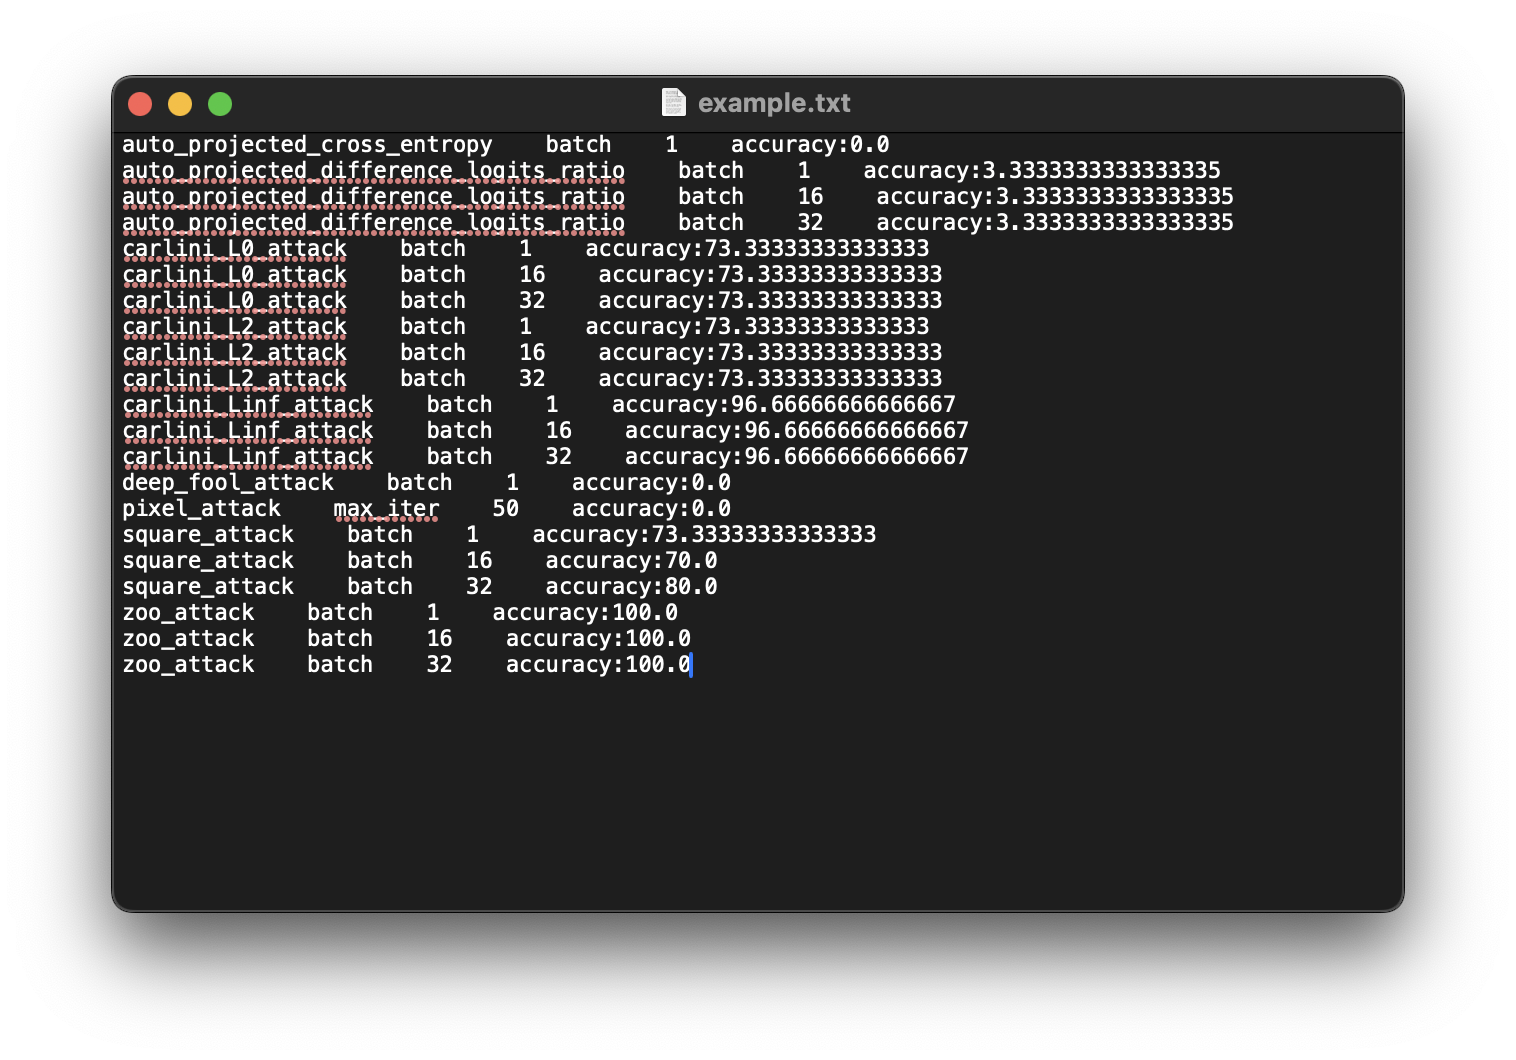

Also, see `img/` directory to see failed/succedded image sample:
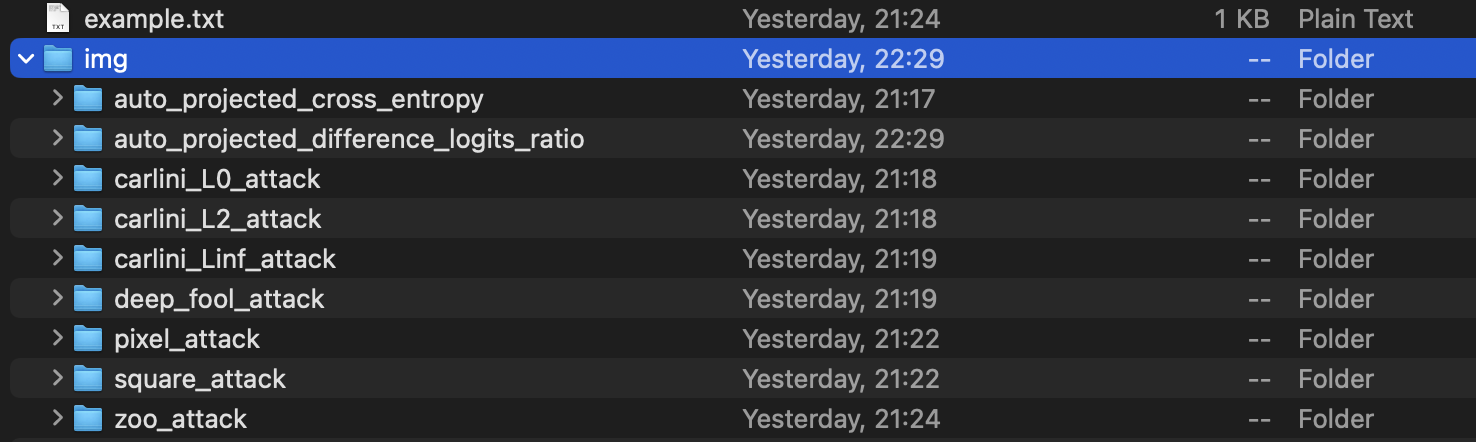